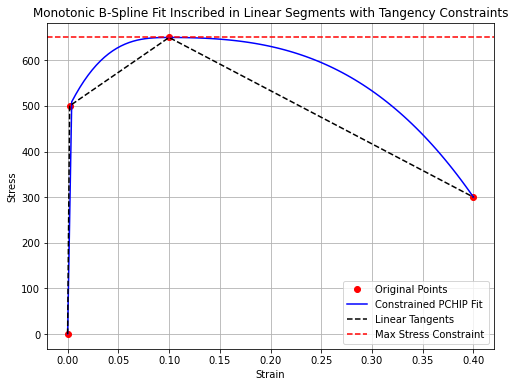

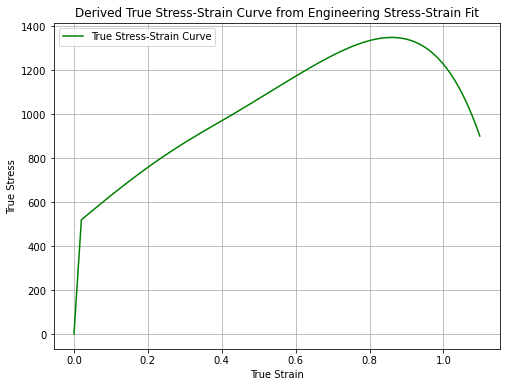

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator

# Define given stress-strain points
eps_y = 0.002
sigma_y = 500
eps_u = 0.1
sigma_u = 650
eps_t = 0.4
sigma_f = 300

# Define control points for the constrained PCHIP fit
eps_control = np.array([0, eps_y, eps_u, eps_t])
sigma_control = np.array([0, sigma_y, sigma_u, sigma_f])

# Use a monotonic cubic interpolant (PCHIP) that preserves tangency and stays within bounds
spline_constrained = PchipInterpolator(eps_control, sigma_control)

# Generate a dense range of strain values for smooth plotting
strain_fine = np.linspace(0, eps_t, 100)
stress_constrained = spline_constrained(strain_fine)

# Compute true stress-strain curve
true_strain = np.log(1 + 5*strain_fine)
true_stress = stress_constrained * (1 + 5*strain_fine)

# Plot the constrained B-spline fit
plt.figure(figsize=(8, 6))
plt.plot(eps_control, sigma_control, 'ro', label='Original Points')  # Original points
plt.plot(strain_fine, stress_constrained, 'b-', label='Constrained PCHIP Fit')  # B-spline curve
plt.plot(eps_control, sigma_control, 'k--', label='Linear Tangents')  # Tangent lines (reference)
plt.axhline(y=sigma_u, color='r', linestyle='dashed', label='Max Stress Constraint')  # Max stress limit
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Monotonic B-Spline Fit Inscribed in Linear Segments with Tangency Constraints')
plt.legend()
plt.grid()
plt.show()

# Plot the true stress-strain curve
plt.figure(figsize=(8, 6))
plt.plot(true_strain, true_stress, 'g-', label='True Stress-Strain Curve')  # True stress-strain curve
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.title('Derived True Stress-Strain Curve from Engineering Stress-Strain Fit')
plt.legend()
plt.grid()
plt.show()
